In [ ]:
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import os
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns

from IPython.display import display, HTML

%matplotlib inline

In [ ]:
graph = nx.read_gml('/content/drive/MyDrive/graph_with_vectors2.gml')

In [ ]:
node_subjects = nx.get_node_attributes(graph,'genre')

In [ ]:
counter =0
list_of_ids =[]
for key, value in node_subjects.items():
    if len(value) != 0:
        list_of_ids.append(counter)
    counter +=1
print(len(list_of_ids))

51139


In [ ]:
list_of_ids = list_of_ids[:17777]

In [ ]:
index_list = [*range(0, len(list_of_ids), 1)] 
node_subjects_series = pd.Series(list(node_subjects.values())[0:len(list_of_ids)], index = index_list, name= "genre")
node_subjects_series = node_subjects_series.replace('country', 'rock')
node_subjects_series = node_subjects_series.replace('blues', 'jazz')
print(node_subjects_series)

0           rock
1           jazz
2            pop
3           jazz
4         reggae
          ...   
17772        pop
17773        pop
17774        pop
17775       rock
17776    hip hop
Name: genre, Length: 17777, dtype: object


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


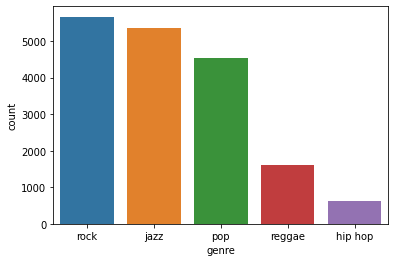

In [ ]:
sns.countplot(node_subjects_series)

In [ ]:
node_vectors = nx.get_node_attributes(graph,'vector')
node_vectors = pd.Series(list(node_vectors.values())[0:len(list_of_ids)], index = index_list, name= "vector")
node_vectors

0        [ 0.96770694 -0.09630404 -0.17622338 -0.616005...
1        [ 0.5623015  -0.1122646   0.13489362 -0.360810...
2        [ 0.37782576 -0.19786286 -0.0064584  -0.270355...
3        [ 5.25924762e-01 -1.27334962e-01 -9.60665000e-...
4        [ 0.9390747  -0.18614742 -0.08539745 -0.785878...
                               ...                        
17772    [ 0.37881794 -0.12299369 -0.12674129 -0.173982...
17773    [ 6.54629995e-01 -1.04872628e-01  3.62852125e-...
17774    [ 0.55045067 -0.04502563  0.09962633 -0.293318...
17775    [ 0.52992257 -0.20066354 -0.09374839 -0.128021...
17776    [ 0.59302279 -0.13503651 -0.01770253 -0.343216...
Name: vector, Length: 17777, dtype: object

In [ ]:
def cleanVectors(vectorInp):
  hold = vectorInp.replace('\n', '').replace('[','').replace(']', '').replace('  ',' ').split(' ')
  res = []
  for i in range(len(hold)):
    if(hold[i] != ''):
      res.append(float(hold[i]))
  #print(len(res))
  return res

In [ ]:
node_vector_d = {}
for i in range(len(node_vectors)):
  node_vector_d[i] = cleanVectors(node_vectors.iloc[i])

In [ ]:
# Retrieve node embeddings and corresponding subjects
node_embeddings = node_vector_d.values()
node_embeddings = list(node_embeddings)

node_targets = node_subjects_series[[int(node_id) for node_id in list_of_ids]]

In [ ]:
# Apply t-SNE transformation on node embeddings
tsne = TSNE(n_components=2)
node_embeddings_2d = tsne.fit_transform(node_embeddings[0:len(list_of_ids)])

In [ ]:
node_embeddings_2d

array([[  7.1917067,  52.583748 ],
       [-33.36808  ,  44.30993  ],
       [ 30.423193 , -73.96292  ],
       ...,
       [-56.31332  ,  42.95642  ],
       [-50.18406  ,   7.4757137],
       [-10.067209 , -28.914013 ]], dtype=float32)

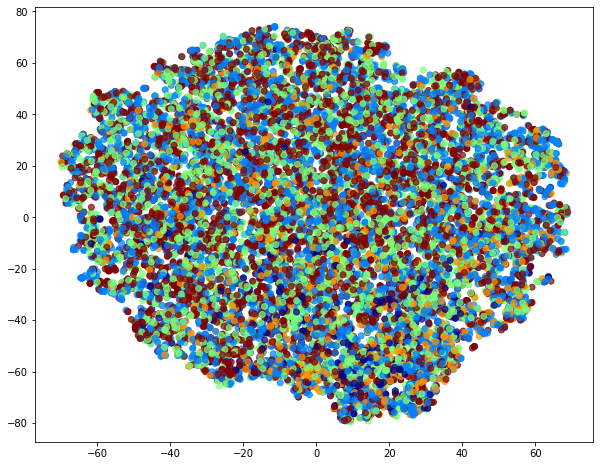

In [ ]:
# draw the points
alpha = 0.7
label_map = {l: i for i, l in enumerate(np.unique(node_targets[0:len(list_of_ids)]))}
node_colours = [label_map[target] for target in node_targets[0:len(list_of_ids)]]

plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    node_embeddings_2d[:, 0],
    node_embeddings_2d[:, 1],
    c=node_colours,
    cmap="jet",
    alpha=alpha,
)

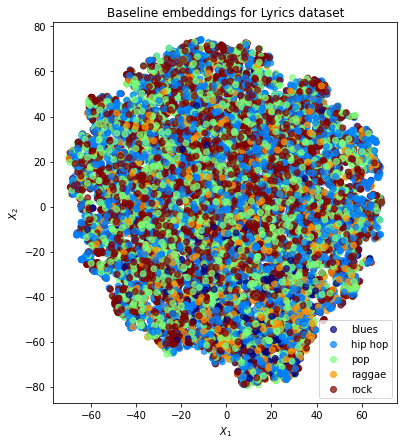

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
scatter =ax.scatter(
    node_embeddings_2d[:, 0],
    node_embeddings_2d[:, 1],
    c=node_subjects_series.astype("category").cat.codes,
    cmap="jet",
    alpha=0.7,
)
ax.set(
    aspect="equal",
    xlabel="$X_1$",
    ylabel="$X_2$",
    title=f"Baseline embeddings for Lyrics dataset",
)
classes = ['blues','hip hop','pop','raggae','rock']
ax.legend(handles=scatter.legend_elements()[0], labels=classes)
# print(type(scatter.legend_elements()[0]))

In [ ]:
print(scatter.legend_elements()[0])

[<matplotlib.lines.Line2D object at 0x7fa202253b90>, <matplotlib.lines.Line2D object at 0x7fa201fa2d90>, <matplotlib.lines.Line2D object at 0x7fa201075810>, <matplotlib.lines.Line2D object at 0x7fa201f21f90>, <matplotlib.lines.Line2D object at 0x7fa201f980d0>]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


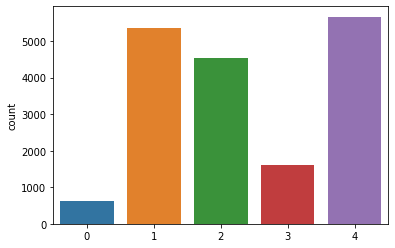

In [ ]:
sns.countplot(node_colours)

In [ ]:
# X will hold the 128-dimensional input features
X = node_embeddings[0:len(list_of_ids)]
# y holds the corresponding target values
y = np.array(node_targets[0:len(list_of_ids)])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=None)

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)

scaler_test = preprocessing.StandardScaler().fit(X_test)
X_scaled_test = scaler.transform(X_test)

In [ ]:
clf = LogisticRegression(
   verbose=False, multi_class="ovr", max_iter=300
)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=False,
                   warm_start=False)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.43363329583802024